In [1]:
%matplotlib inline

import numpy

from matplotlib import pyplot

from reinfocus.graphics import camera
from reinfocus.graphics import render
from reinfocus.graphics import shape_factory
from reinfocus.graphics import vector
from reinfocus.graphics import world

In [2]:
targets = [2, 3.75, 5.5, 7.25, 9]

worlds = world.Worlds(
    shape_factory.one_rect(shape_factory.ShapeParameters(distance=2)),
    shape_factory.mixed(
        shape_factory.ShapeParameters(distance=2),
        shape_factory.ShapeParameters(distance=5.5),
    ),
    shape_factory.one_sphere(shape_factory.ShapeParameters(distance=5.5)),
    shape_factory.two_rect(
        shape_factory.ShapeParameters(distance=5.5),
        shape_factory.ShapeParameters(distance=9),
    ),
    shape_factory.one_sphere(shape_factory.ShapeParameters(distance=9)),
)

In [3]:
frame_shape = (300, 600)

cameras = camera.Cameras(
    *[
        camera.make_gpu_camera(
            aspect_ratio=frame_shape[1] / frame_shape[0],
            focus_distance=float(numpy.interp(i, [0, 4], [10, 5])),
            look_at=vector.v3f(0, 0, -targets[i]),
            look_from=vector.v3f(float(numpy.interp(i, [0, 4], [-3, 3])), 0, 0),
        )
        for i in range(5)
    ]
)

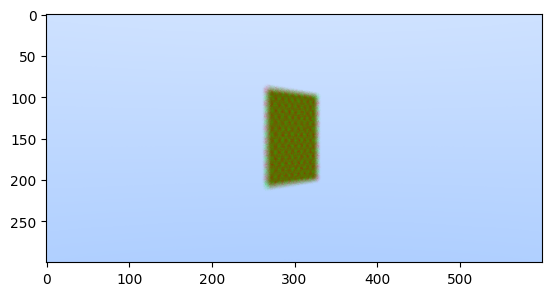

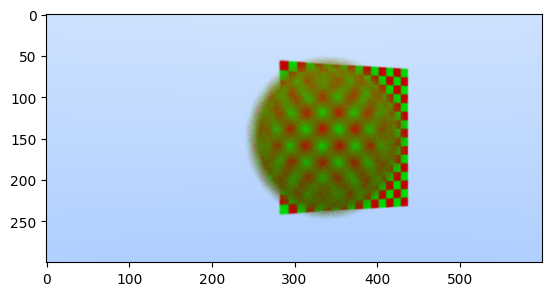

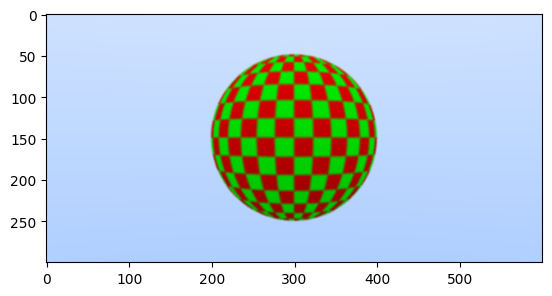

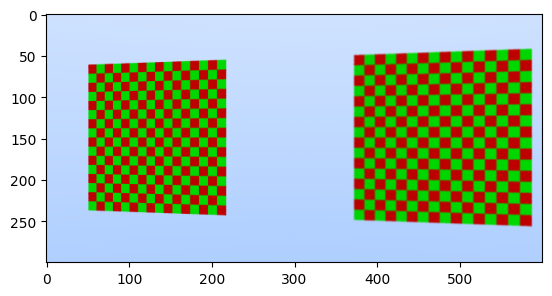

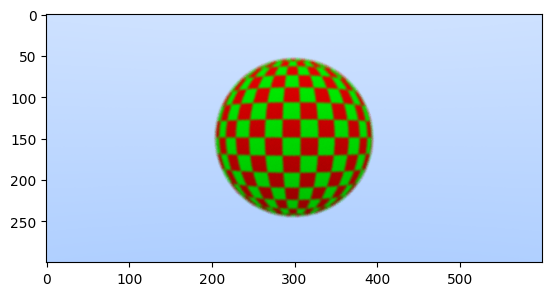

In [4]:
for frame in render.render(worlds, cameras, frame_shape):
    pyplot.figure()
    pyplot.imshow(frame)